# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import datetime

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# citipy.nearest_city(44.967057, -92.994648).city_name
# citipy.nearest_city(44.967057, 0).city_name

In [2]:
# Import API key
#from api_keys import api_key
from OpenWeatherMap import api_key

# Base URL for Weather API
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Open Weather Map restrict API call for free user
# Free user can make 60 requests per min (58 for safe run)
free_per_min = 58

# Configuration
degree=u'\N{DEGREE SIGN}'
units_dict = {
            "standard": {"units":"standard", "Temp Scale":"K", "Speed Scale" : "meter/sec"},
            "metric": {"units":"metric", "Temp Scale":degree+"C", "Speed Scale" : "meter/sec"},
            "imperial": {"units":"imperial", "Temp Scale":degree+"F", "Speed Scale" : "miles/hour"}
            }

units="imperial"
Temp_scale=units_dict[units]["Temp Scale"]
Speed_scale=units_dict[units]["Speed Scale"]

# build partial url
citi_url = f"{base_url}appid={api_key}&units={units}&q="

In [3]:
# Output File (CSV)
output_data_file = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Create Cities Dataframe to store the data
cities_df = pd.DataFrame({"City": cities})
cities_df["City"]

0         souillac
1          mataura
2      tuktoyaktuk
3          kahului
4        taolanaro
          ...     
634        chulman
635        berekum
636    pak phanang
637     gold coast
638         cudahy
Name: City, Length: 639, dtype: object

In [6]:
# Add columns to store Weather data
cities_df["Country"] = ""
cities_df["Lat"] = ""
cities_df["Lon"] = ""
cities_df["Date"] = ""
cities_df["Max Temp"] = np.nan
cities_df["Humidity"] = np.nan
cities_df["Cloudiness"] = np.nan
cities_df["Wind Speed"] = np.nan
cities_df

,City,Country,Lat,Lon,Date,Max Temp,Humidity,Cloudiness,Wind Speed
0,souillac,,,,,NaN,NaN,NaN,NaN
1,mataura,,,,,NaN,NaN,NaN,NaN
2,tuktoyaktuk,,,,,NaN,NaN,NaN,NaN
3,kahului,,,,,NaN,NaN,NaN,NaN
4,taolanaro,,,,,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
634,chulman,,,,,NaN,NaN,NaN,NaN
635,berekum,,,,,NaN,NaN,NaN,NaN
636,pak phanang,,,,,NaN,NaN,NaN,NaN
637,gold coast,,,,,NaN,NaN,NaN,NaN


In [7]:
# iterate through each site in the Cities list
print(f"Beginning Weather data Retrieval, Current Time: {time.ctime(datetime.datetime.now().timestamp())}")
print("-----------------------------")

# Date when the data is pulled, from the API
today_date = datetime.date.strftime(datetime.date.today(), '%m/%d/%Y')

# Loop through each city, and make the api call, assign the result to dataframe
for index, row in cities_df.iterrows():
    city = row["City"]
    
    
    #Make the weather api call for the city
    weather_json = requests.get(citi_url + city).json()
    
    try:
        print(f"Processing record:{index+1}, City: {city}")
        #assign the json result to respective column.
        cities_df.at[index, "Country"] = weather_json["sys"]["country"]
        cities_df.at[index, "Lat"] = weather_json["coord"]["lat"]
        cities_df.at[index, "Lon"] = weather_json["coord"]["lon"]
        cities_df.at[index, "Date"] = weather_json["dt"]
        cities_df.at[index, "Max Temp"] = weather_json["main"]["temp_max"]
        cities_df.at[index, "Humidity"] = weather_json["main"]["humidity"]
        cities_df.at[index, "Cloudiness"] = weather_json["clouds"]["all"]
        cities_df.at[index, "Wind Speed"] = weather_json["wind"]["speed"]
    except (KeyError, IndexError):
        print(f'City "{city}" not found. Skipping...')
        
    # take program to 1 min sleep, for every free request count
    # Pausing the call for 60 seconds, since it was observed that 58 calls are made within 30 seconds
    if (index+1) % free_per_min == 0:
        print(f"Paused for 40 sec, current time: {time.ctime(datetime.datetime.now().timestamp())}")
        time.sleep(40)  
print("-----------------------------")  
print("Data retrival completed") 
# print(json.dumps(weather_json, indent=4, sort_keys=True))

Beginning Weather data Retrieval, Current Time: Tue Oct 15 02:05:31 2019
-----------------------------
Processing record:1, City: souillac
Processing record:2, City: mataura
Processing record:3, City: tuktoyaktuk
Processing record:4, City: kahului
Processing record:5, City: taolanaro
City "taolanaro" not found. Skipping...
Processing record:6, City: butaritari
Processing record:7, City: jamestown
Processing record:8, City: rikitea
Processing record:9, City: norman wells
Processing record:10, City: la asuncion
Processing record:11, City: lenger
Processing record:12, City: arraial do cabo
Processing record:13, City: kapaa
Processing record:14, City: fairbanks
Processing record:15, City: albany
Processing record:16, City: new norfolk
Processing record:17, City: pundaguitan
Processing record:18, City: puerto ayora
Processing record:19, City: coquimbo
Processing record:20, City: busselton
Processing record:21, City: punta arenas
Processing record:22, City: hoxter
City "hoxter" not found. Sk

Processing record:190, City: san patricio
Processing record:191, City: gashua
Processing record:192, City: richards bay
Processing record:193, City: hobyo
Processing record:194, City: pichayevo
Processing record:195, City: hervey bay
Processing record:196, City: hede
Processing record:197, City: fomboni
Processing record:198, City: ubinskoye
Processing record:199, City: northam
Processing record:200, City: khatanga
Processing record:201, City: swan river
Processing record:202, City: izhma
Processing record:203, City: prunisor
Processing record:204, City: marquette
Processing record:205, City: ust-nera
Processing record:206, City: saint-philippe
Processing record:207, City: quanzhou
Processing record:208, City: palabuhanratu
City "palabuhanratu" not found. Skipping...
Processing record:209, City: bayan
Processing record:210, City: ifakara
Processing record:211, City: mys shmidta
City "mys shmidta" not found. Skipping...
Processing record:212, City: grindavik
Processing record:213, City:

Processing record:377, City: jiangyou
Processing record:378, City: zambezi
Processing record:379, City: bairiki
City "bairiki" not found. Skipping...
Processing record:380, City: ambon
Processing record:381, City: ryazhsk
Processing record:382, City: san jose
Processing record:383, City: jimeta
Processing record:384, City: road town
Processing record:385, City: lethem
Processing record:386, City: iwaki
Processing record:387, City: longhua
Processing record:388, City: wulanhaote
City "wulanhaote" not found. Skipping...
Processing record:389, City: poso
Processing record:390, City: east wenatchee bench
Processing record:391, City: vila velha
Processing record:392, City: obo
Processing record:393, City: victoria point
Processing record:394, City: aginskoye
Processing record:395, City: xianshuigu
Processing record:396, City: khasan
Processing record:397, City: puerto madryn
Processing record:398, City: beni suef
Processing record:399, City: omboue
Processing record:400, City: havre-saint-p

Processing record:569, City: carutapera
Processing record:570, City: martapura
Processing record:571, City: aketi
Processing record:572, City: jackson
Processing record:573, City: asau
City "asau" not found. Skipping...
Processing record:574, City: pochutla
Processing record:575, City: auki
Processing record:576, City: celestun
Processing record:577, City: goba
Processing record:578, City: jiddah
City "jiddah" not found. Skipping...
Processing record:579, City: west bay
Processing record:580, City: maridi
City "maridi" not found. Skipping...
Paused for 40 sec, current time: Tue Oct 15 02:13:23 2019
Processing record:581, City: karkaralinsk
City "karkaralinsk" not found. Skipping...
Processing record:582, City: neiafu
Processing record:583, City: acajutla
Processing record:584, City: amarante do maranhao
Processing record:585, City: bandipur
Processing record:586, City: calbe
Processing record:587, City: kosh-agach
Processing record:588, City: kutum
Processing record:589, City: kismayo


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#Check Cities dataframe to see if we have any cities without any data from API
cities_df.count()

City          639
Country       639
Lat           639
Lon           639
Date          639
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
dtype: int64

In [9]:
# Drop cities with no value returned
cities_df = cities_df.dropna(axis = 0, how='any')
# City Dataframe, count to validate
cities_df.count()

City          568
Country       568
Lat           568
Lon           568
Date          568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
dtype: int64

In [10]:
#Display Cities Dataframe, with the values that where pulled from API
cities_df

,City,Country,Lat,Lon,Date,Max Temp,Humidity,Cloudiness,Wind Speed
0,souillac,FR,45.6,-0.6,1571123131,53.60,93.0,100.0,5.82
1,mataura,NZ,-46.19,168.86,1571123046,52.00,85.0,0.0,8.01
2,tuktoyaktuk,CA,69.44,-133.03,1571123132,23.94,82.0,0.0,13.72
3,kahului,US,20.89,-156.47,1571123132,78.80,74.0,20.0,14.99
5,butaritari,KI,3.07,172.79,1571123132,83.08,72.0,93.0,6.37
...,...,...,...,...,...,...,...,...,...
634,chulman,RU,56.84,124.9,1571123653,26.83,86.0,100.0,10.07
635,berekum,GH,7.45,-2.58,1571123653,70.41,98.0,99.0,7.13
636,pak phanang,TH,8.35,100.2,1571123654,78.80,94.0,40.0,5.82
637,gold coast,AU,-28,153.41,1571123654,77.00,73.0,75.0,13.87


In [11]:
# Export file as a CSV, without the Pandas index, but with the header
cities_df.to_csv("Output/Cities_Weather.csv", index=False, header=True)

In [12]:
# Adding additional fields for Ploting
# lowest temp recorded at groundlevel −128.6 °F
# highest temp. recorded at groundlevel 136 °F 
#Create Bins for Temperature
temp_F_bins = [-150,-20,-10,0,10,20,30,40,50,60,70,80,90,100,110,200]

if units == "standard":
    temp_bins = [(((F-32) * (5/9)) + 273.15) for F in temp_F_bins]

if units == "metric":
    temp_bins = [((F-32) * (5/9)) for F in temp_F_bins]

if units == "imperial":
    temp_bins = temp_F_bins
    
# Create labels for the each of the bins
temp_color = ["violet","megenta", "darkviolet", "mediumblue", "royalblue", "skyblue", "cyan", "lime", "yellow","gold","orange", "orangered", "red", "firebrick", "brown"]

#Assign each age, a age group, and store it in a new field.
cities_df["Temp Color"] = pd.cut(cities_df["Max Temp"], temp_bins, labels=temp_color)
# cities_df["Temp Color"] = "red"
cities_df

,City,Country,Lat,Lon,Date,Max Temp,Humidity,Cloudiness,Wind Speed,Temp Color
0,souillac,FR,45.6,-0.6,1571123131,53.60,93.0,100.0,5.82,yellow
1,mataura,NZ,-46.19,168.86,1571123046,52.00,85.0,0.0,8.01,yellow
2,tuktoyaktuk,CA,69.44,-133.03,1571123132,23.94,82.0,0.0,13.72,skyblue
3,kahului,US,20.89,-156.47,1571123132,78.80,74.0,20.0,14.99,orange
5,butaritari,KI,3.07,172.79,1571123132,83.08,72.0,93.0,6.37,orangered
...,...,...,...,...,...,...,...,...,...,...
634,chulman,RU,56.84,124.9,1571123653,26.83,86.0,100.0,10.07,skyblue
635,berekum,GH,7.45,-2.58,1571123653,70.41,98.0,99.0,7.13,orange
636,pak phanang,TH,8.35,100.2,1571123654,78.80,94.0,40.0,5.82,orange
637,gold coast,AU,-28,153.41,1571123654,77.00,73.0,75.0,13.87,orange


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

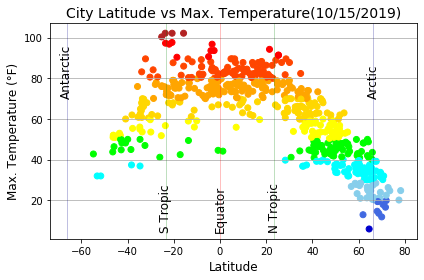

In [13]:
# Create scatter plot to show the Max. Temperature, for the latitude 
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o", color=cities_df["Temp Color"])

#Title, X and Y axis labels
plt.grid(b=True, axis="y")
plt.title(f'City Latitude vs Max. Temperature({today_date})', fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel(f'Max. Temperature ({Temp_scale})', fontsize=12)

#lines for Tropic or Capricon (South Tropic), Tropic of Cancer (North Tropic) and Equator
plt.axvline(0, linestyle='-', color='red', alpha=0.5, linewidth=0.5)
plt.axvline(-23.4, linestyle='-', color='green', alpha=0.5, linewidth=0.5)
plt.axvline(23.4, linestyle='-', color='green', alpha=0.5, linewidth=0.5)
plt.axvline(-66.33, linestyle='-', color='darkblue', alpha=0.5, linewidth=0.5)
plt.axvline(66.33, linestyle='-', color='darkblue', alpha=0.5, linewidth=0.5)

#Text markers for each of the latitude lines.
xmark = [-66.33,-23.4,0,23.4,66.33]
xlabel = ["Antarctic", "S Tropic","Equator","N Tropic", "Arctic"]
ymin = cities_df["Max Temp"].min()
ymax = cities_df["Max Temp"].max()
ymark = [(ymax*0.7), ymin, ymin, ymin, (ymax*0.7)]

for ind in range(len(xmark)):
    plt.text(x = xmark[ind] , y = ymark[ind], s = xlabel[ind], size = 12, horizontalalignment='center', rotation=90, color='black')

# fit layout
plt.tight_layout()

# Save the Figure
plt.savefig("Images/Latitude_vs_Temperature.png")

#### Latitude vs. Humidity Plot

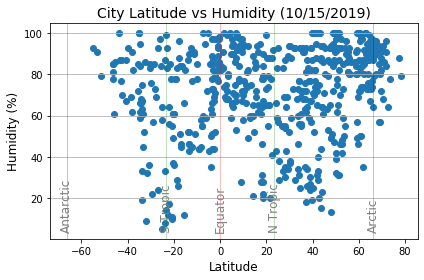

In [14]:
# Create scatter plot to show the Humidity, for the latitude 
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o")
#Title, X and Y axis labels
plt.grid(b=True, axis="y")
plt.title(f'City Latitude vs Humidity ({today_date})', fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel(f'Humidity (%)', fontsize=12)

#lines for Tropic or Capricon (South Tropic), Tropic of Cancer (North Tropic) and Equator
plt.axvline(0, linestyle='-', color='red', alpha=0.5, linewidth=0.5)
plt.axvline(-23.4, linestyle='-', color='green', alpha=0.5, linewidth=0.5)
plt.axvline(23.4, linestyle='-', color='green', alpha=0.5, linewidth=0.5)
plt.axvline(-66.33, linestyle='-', color='darkblue', alpha=0.5, linewidth=0.5)
plt.axvline(66.33, linestyle='-', color='darkblue', alpha=0.5, linewidth=0.5)

#Text markers for each of the latitude lines.
ymark = cities_df["Humidity"].min()

for ind in range(len(xmark)):
    plt.text(x = xmark[ind] , y = ymark, s = xlabel[ind], size = 12, horizontalalignment='center', rotation=90, color='gray')

# fit layout
plt.tight_layout()

# Save the Figure
plt.savefig("Images/Latitude_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

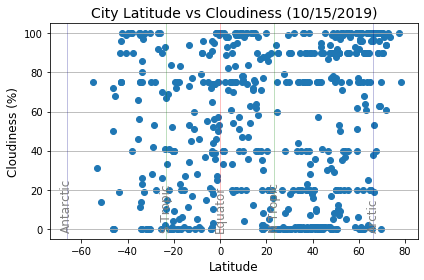

In [15]:
# Create scatter plot to show the Cloudiness, for the latitude 
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o")
#Title, X and Y axis labels
plt.grid(b=True, axis="y")
plt.title(f'City Latitude vs Cloudiness ({today_date})', fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel(f'Cloudiness (%)', fontsize=12)

#lines for Tropic or Capricon (South Tropic), Tropic of Cancer (North Tropic) and Equator
plt.axvline(0, linestyle='-', color='red', alpha=0.5, linewidth=0.5)
plt.axvline(-23.4, linestyle='-', color='green', alpha=0.5, linewidth=0.5)
plt.axvline(23.4, linestyle='-', color='green', alpha=0.5, linewidth=0.5)
plt.axvline(-66.33, linestyle='-', color='darkblue', alpha=0.5, linewidth=0.5)
plt.axvline(66.33, linestyle='-', color='darkblue', alpha=0.5, linewidth=0.5)

#Text markers for each of the latitude lines.
ymark = cities_df["Cloudiness"].min()

for ind in range(len(xmark)):
    plt.text(x = xmark[ind] , y = ymark, s = xlabel[ind], size = 12, horizontalalignment='center', rotation=90, color='gray')

# fit layout
plt.tight_layout()

# Save the Figure
plt.savefig("Images/Latitude_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

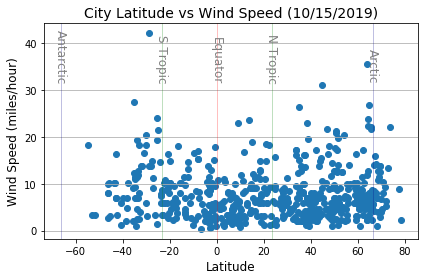

In [16]:
# Create scatter plot to show the Wind Speed, for the latitude 
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o")

#Title, X and Y axis labels
plt.grid(b=True, axis="y")
plt.title(f'City Latitude vs Wind Speed ({today_date})', fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel(f'Wind Speed ({Speed_scale})', fontsize=12)

#lines for Tropic or Capricon (South Tropic), Tropic of Cancer (North Tropic) and Equator
plt.axvline(0, linestyle='-', color='red', alpha=0.5, linewidth=0.5)
plt.axvline(-23.4, linestyle='-', color='green', alpha=0.5, linewidth=0.5)
plt.axvline(23.4, linestyle='-', color='green', alpha=0.5, linewidth=0.5)
plt.axvline(-66.33, linestyle='-', color='darkblue', alpha=0.5, linewidth=0.5)
plt.axvline(66.33, linestyle='-', color='darkblue', alpha=0.5, linewidth=0.5)

#Text markers for each of the latitude lines.
ymark = cities_df["Wind Speed"].max()-10

for ind in range(len(xmark)):
    plt.text(x = xmark[ind] , y = ymark, s = xlabel[ind], size = 12, horizontalalignment='center', rotation=-90, color='gray')

# fit layout
plt.tight_layout()

# Save the Figure
plt.savefig("Images/Latitude_vs_Wind_Speed.png")